In [28]:
import pandas as pd


tic='brent'

# Location of dataset
#file = "C:\\Users\\KocurLocur\\Desktop\\jupyter\\TT_dax_data_new.txt"
file = "http://bpk.nazwa.pl/111/test.php?tic="+tic
TT_days=100

In [29]:
# Assign colum names to the dataset
names = ['Date', 'Price', 'Vol', 'T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11']
# Read dataset to pandas dataframe
df = pd.read_csv(file, names=names) 
#Check dayWeek
df['Date']=pd.to_datetime(df['Date'])
df['D']=df['Date'].dt.dayofweek
df.iloc[:,2:15]=df.iloc[:,2:15].astype(float)

In [30]:
df.to_csv('MyFx\\brent_tt.csv',index=False)

In [5]:
df.head()

,Date,Price,Vol,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,D
0,2020-01-03,13219.14,80.79,2.0,3.0,1.0,3.0,3.0,2.0,2.0,-2.0,-2.0,-2.0,-2.0,4.0
1,2020-01-02,13385.93,75.34,2.0,3.0,1.0,3.0,3.0,2.0,2.0,-2.0,-2.0,-2.0,-2.0,3.0
2,2020-01-01,13249.01,31.43,2.0,3.0,1.0,3.0,3.0,2.0,2.0,-2.0,-2.0,-2.0,-2.0,2.0
3,2019-12-31,13249.01,31.43,2.0,3.0,1.0,3.0,3.0,2.0,2.0,-2.0,-2.0,-2.0,-2.0,1.0
4,2019-12-30,13249.01,31.43,2.0,3.0,1.0,3.0,3.0,2.0,2.0,-2.0,-2.0,-2.0,-2.0,0.0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
ss=df[['Price','D','Vol']][:100]

ss['Price']=ss['Price'].pct_change(periods=1)
ss['Vol']=ss['Vol'].pct_change()
ss=ss.dropna()
ss

,Price,D,Vol
1,0.012617,3.0,-0.067459
2,-0.010229,2.0,-0.582825
3,0.000000,1.0,0.000000
4,0.000000,0.0,0.000000
5,0.006650,4.0,0.392300
...,...,...,...
95,0.005509,0.0,0.139910
96,-0.013028,4.0,0.453734
97,-0.012979,3.0,0.022970
98,0.007009,2.0,-0.091275


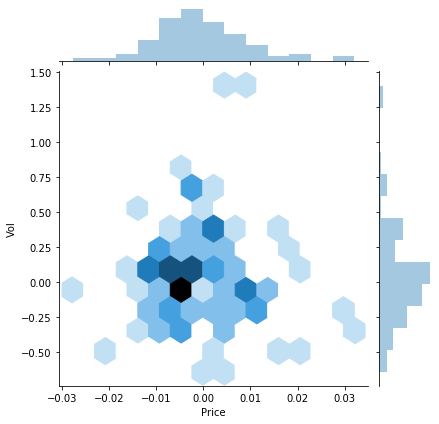

In [30]:
df.set_index('Date')
sns.jointplot(data=ss,x='Price',y='Vol',kind='hex')

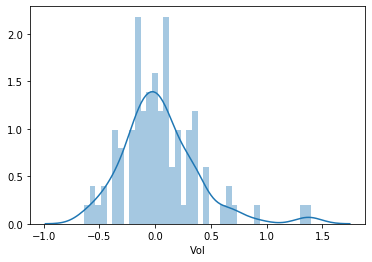

In [31]:
df.set_index('Date')
sns.distplot(ss['Vol'],bins=40)


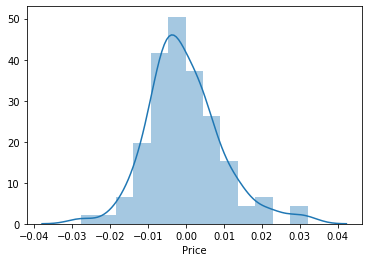

In [32]:
sns.distplot(ss['Price'])

In [33]:
#count percentage volume from day before
df['Vol']=df['Vol'].apply(pd.to_numeric, errors='coerce')

if (tic=='gold' or tic=='brent'):
    df['%_v1']=0.0
else:
    df['%_v1']=100*(1-df['Vol'].shift(-1)/df['Vol'])
    df['%_v1']=df['%_v1'].apply(pd.to_numeric, errors='coerce')

In [34]:
#shift values
for y in range(1,TT_days+1):
    for x in range (1,12):
        df['T'+str(x)+'_'+str(y)]=df['T'+str(x)].shift(-y) 

In [35]:
for y in range(1,6):
    df['%_p'+str(y)]=100*(1-df['Price'].shift(y)/df['Price'])
df.head(5)

,Date,Price,Vol,T1,T2,T3,T4,T5,T6,T7,...,T7_100,T8_100,T9_100,T10_100,T11_100,%_p1,%_p2,%_p3,%_p4,%_p5
0,2019-10-15,12629.79,94.19,2.0,2.0,1.0,3.0,3.0,3.0,3.0,...,-2.0,-2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
1,2019-10-14,12486.56,59.09,2.0,2.0,1.0,3.0,3.0,3.0,3.0,...,-2.0,-2.0,2.0,2.0,2.0,-1.147073,NaN,NaN,NaN,NaN
2,2019-10-11,12511.65,100.87,2.0,2.0,1.0,3.0,3.0,3.0,3.0,...,-2.0,-2.0,2.0,2.0,2.0,0.200533,-0.944240,NaN,NaN,NaN
3,2019-10-10,12164.20,88.44,2.0,2.0,1.0,2.0,2.0,2.0,2.0,...,-2.0,-2.0,2.0,2.0,2.0,-2.856333,-2.650072,-3.827543,NaN,NaN
4,2019-10-09,12094.26,68.81,2.0,2.0,1.0,2.0,2.0,2.0,2.0,...,-2.0,-2.0,2.0,2.0,2.0,-0.578291,-3.451141,-3.243688,-4.427968,NaN


In [36]:
import numpy as np
df['Max']=df[["%_p1", "%_p2","%_p3","%_p4","%_p5"]].max(axis=1)
df['Min']=df[["%_p1", "%_p2","%_p3","%_p4","%_p5"]].min(axis=1)
df=df.replace([np.inf, -np.inf], np.nan)
df=df.dropna()

In [ ]:
df['y']=0
df.loc[(df['Min'] <=-2), 'y'] = -1
df.loc[(df['Max'] >=1 ), 'y'] = 1
df.loc[(df['Max'] >=1 ) & (df['Min'] <=-2 ), 'y'] = 2
df.head(5)
df.columns

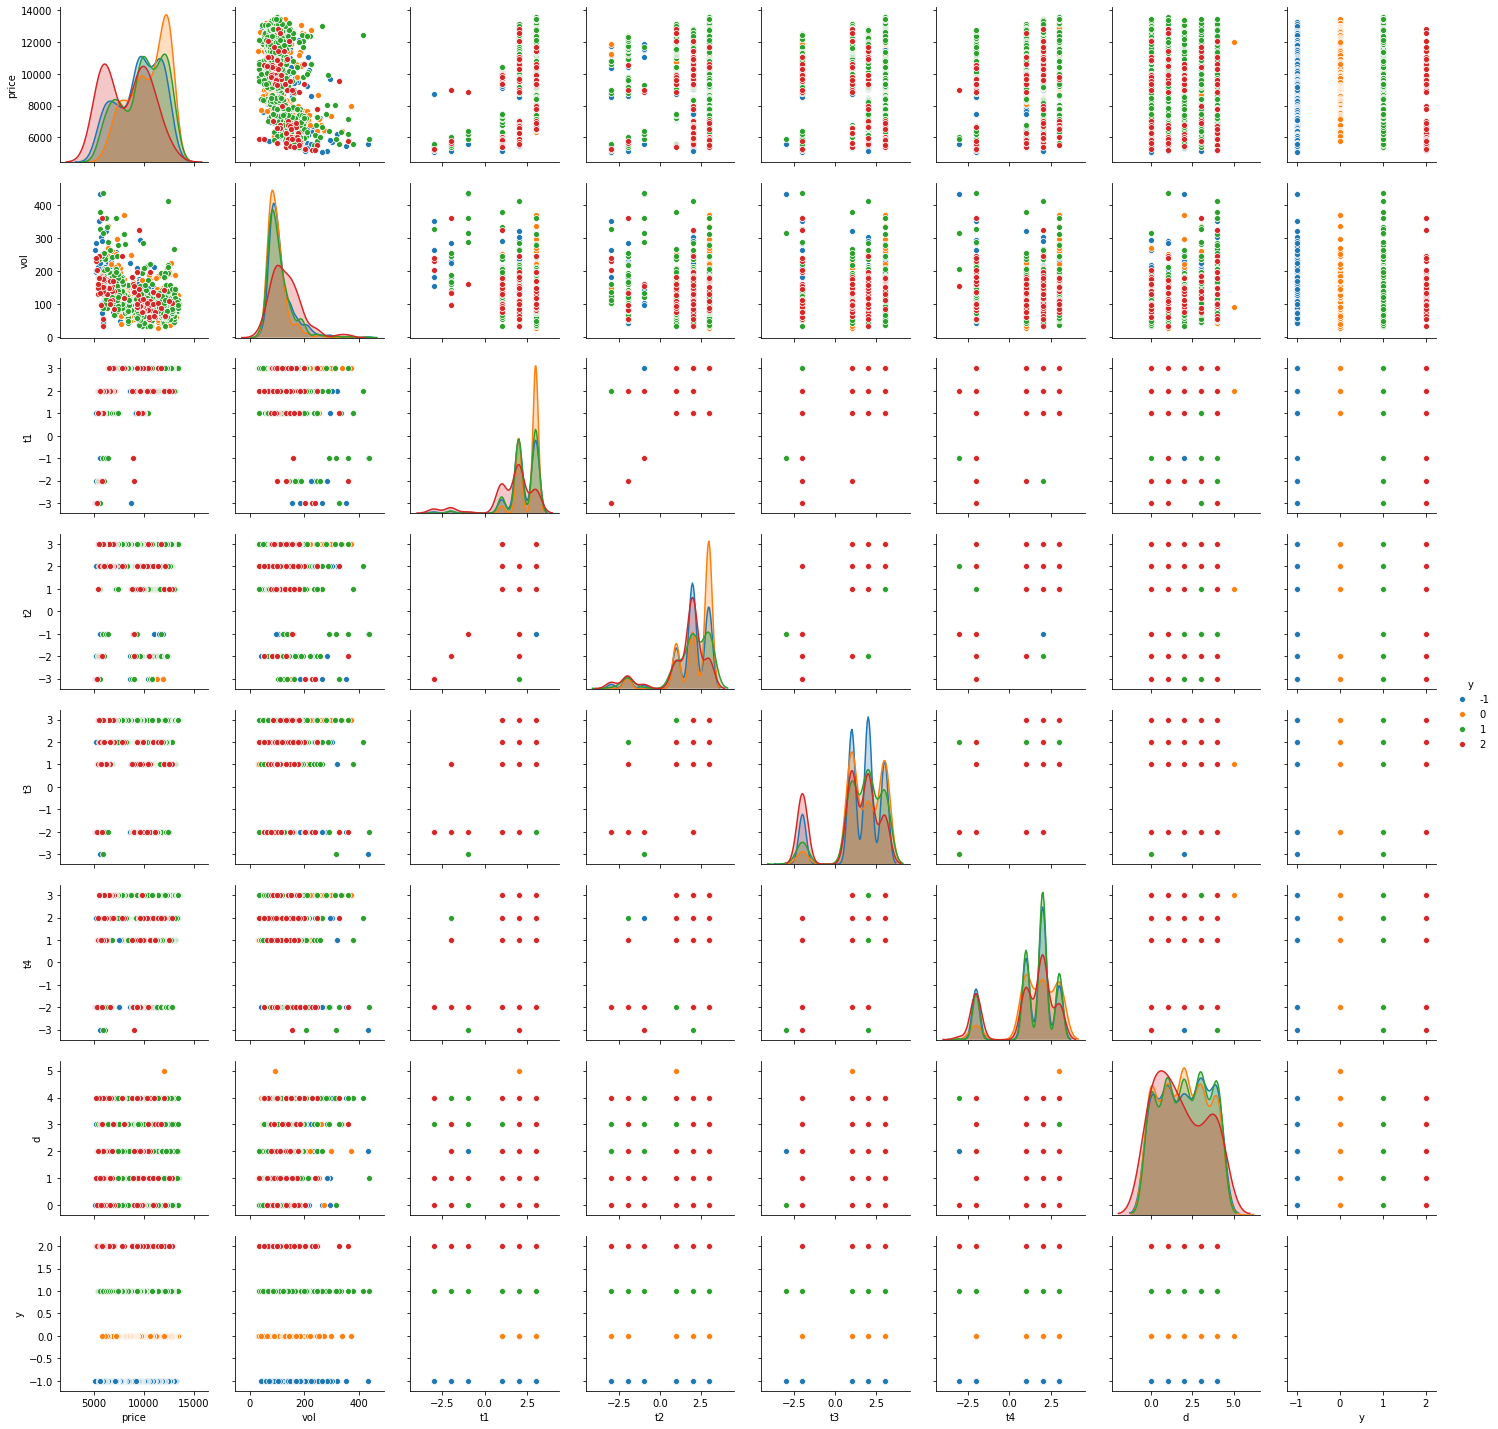

In [40]:
ds=pd.DataFrame({'price': df['Price'],'vol':df['Vol'],
                 't1':df['T1'],'t2':df['T2'],'t3':df['T3'],'t4':df['T4'],
                 
                 'd':df['D'],'y': df['y']})
sns.pairplot(data=ds,hue='y')

In [10]:
X = df.iloc[:, 3:(16+11*TT_days)]
y=df.iloc[:,-1]
X.head(5)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T2_100,T3_100,T4_100,T5_100,T6_100,T7_100,T8_100,T9_100,T10_100,T11_100
5,2.0,2.0,2.0,-2.0,-2.0,2.0,2.0,2.0,-2.0,-2.0,...,1.0,2.0,2.0,2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
6,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
7,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
8,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
9,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0


In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
X_train , y_train
X_test.size
#y_test.value_counts()
#y_test.values.reshape(-1),y_test


978327

In [12]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [13]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier(hidden_layer_sizes=(3000,3000,3000), max_iter=1000,verbose=True)  
mlp.fit(X_train, y_train.values.reshape(-1))  
#mlp.fit(X_train, y_train)


Iteration 1, loss = 3.28287783
Iteration 2, loss = 1.16581386
Iteration 3, loss = 1.04925594
Iteration 4, loss = 0.89371554
Iteration 5, loss = 0.74914463
Iteration 6, loss = 0.66760924
Iteration 7, loss = 0.57971114
Iteration 8, loss = 0.53589747
Iteration 9, loss = 0.47104269
Iteration 10, loss = 0.44708577
Iteration 11, loss = 0.37763634
Iteration 12, loss = 0.30116909
Iteration 13, loss = 0.27141843
Iteration 14, loss = 0.30127657
Iteration 15, loss = 0.27743830
Iteration 16, loss = 0.21960811
Iteration 17, loss = 0.21594013
Iteration 18, loss = 0.21251803
Iteration 19, loss = 0.21118976
Iteration 20, loss = 0.21135738
Iteration 21, loss = 0.17508881
Iteration 22, loss = 0.15751108
Iteration 23, loss = 0.18809537
Iteration 24, loss = 0.16504290
Iteration 25, loss = 0.14285280
Iteration 26, loss = 0.11715524
Iteration 27, loss = 0.08908266
Iteration 28, loss = 0.07173962
Iteration 29, loss = 0.07397963
Iteration 30, loss = 0.06954342
Iteration 31, loss = 0.08029325
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3000, 3000, 3000), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [14]:
predictions = mlp.predict(X_test) 

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
a,b,c,d,=confusion_matrix(y_test,predictions)

[[177  17  75  34]
 [ 13  43  25   1]
 [ 49  32 282  23]
 [ 33   3  39  33]]
              precision    recall  f1-score   support

          -1       0.65      0.58      0.62       303
           0       0.45      0.52      0.49        82
           1       0.67      0.73      0.70       386
           2       0.36      0.31      0.33       108

    accuracy                           0.61       879
   macro avg       0.53      0.54      0.53       879
weighted avg       0.61      0.61      0.61       879



In [16]:
prec=round((2*a[0]-b[0]*0.5-c[0]-d[0])/(a[0]+b[0]+c[0]+d[0]),4)

prec,(2*a[0]-b[0]*0.5-c[0]-d[0])/sum(a)


(0.9761, 0.8762376237623762)

In [17]:
import datetime
now = datetime.datetime.now()
filename='_'.join((tic,now.strftime('%Y%m%d'),str(a[0]),str(b[0]),str(c[0]),str(int(prec*1000))))

In [18]:
from joblib import dump,load
dump(mlp,filename+'_mlp.joblib')
dump(scaler,filename+'_scaler.joblib')

['brent_20191008_177_13_49_976_scaler.joblib']

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#clf = tree.DecisionTreeClassifier(criterion='gini')
clf= RandomForestClassifier(n_estimators=1000, random_state=0,verbose=1) 

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train.values.reshape(-1))


#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
a,b,c,d,=confusion_matrix(y_test,y_pred)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
prec=round((2*a[0]-b[0]*0.5-c[0]-d[0])/(a[0]+b[0]+c[0]+d[0]),4)

prec,(2*a[0]-b[0]*0.5-c[0]-d[0])/sum(a)

In [ ]:
dump(clf,tic+'_forest.joblib')

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = GaussianNB()
model.fit(X_train, y_train.values.reshape(-1))

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
a,b,c,d,=confusion_matrix(y_test,y_pred)

In [ ]:
prec=round((2*a[0]-b[0]*0.5-c[0]-d[0])/(a[0]+b[0]+c[0]+d[0]),4)

prec,(2*a[0]-b[0]*0.5-c[0]-d[0])/sum(a)

In [ ]:
#import graphviz 
#dot_data = tree.export_graphviz(clf, out_file=None,class_names=['-1','0','1','2']) 
#graph = graphviz.Source(dot_data) 
#graph.render(tic) 

In [ ]:
'''
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
'''

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

dataset = datasets.load_iris()

In [ ]:
model = GaussianNB()
model.fit(dataset.data, dataset.target)

In [ ]:
expected = dataset.target
predicted = model.predict(dataset.data)

In [ ]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))